In [5]:
import pandas as pd
import pyspark
from pyspark.sql import SparkSession


In [7]:
spark=SparkSession.builder.appName("ExcelReader").getOrCreate()
print(spark.version)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/27 10:58:49 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


3.5.4


25/03/27 10:58:49 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [8]:
menu_df=pd.read_excel('menu.xlsx',engine="openpyxl")
menu_expanded_df=pd.read_excel('starbucks_drinkMenu_expanded.xlsx',engine="openpyxl")
nutrition_drinks_df=pd.read_excel('starbucks-menu-nutrition-drinks.xlsx',engine="openpyxl")
nutrition_food_df=pd.read_excel('starbucks-menu-nutrition-food.xlsx',engine="openpyxl")

In [9]:
menu_expanded_df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.00,0.00,0.00,0.00,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.00,0.00,0.00,0.00,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.00,0.00,0.00,0.00,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.00,0.00,0.02,0.00,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,0.10,0.00,0.20,0.00,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,2024-03-02 00:00:00,0.4,0.0,0,250,67,1,64,5.0,0.06,0.08,0.20,0.10,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,0.06,0.00,0.10,0.00,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,0.06,0.00,0.10,0.00,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,0.04,0.00,0.10,0.06,0


In [10]:
menu_df.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [11]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, FloatType, BooleanType, DecimalType
from pyspark.sql.functions import col, year, month, dayofmonth, when, avg


menu_schema = StructType([
    StructField("Category", StringType(), True),
    StructField("Item", StringType(), True),
    StructField("Serving Size", StringType(), True),
    StructField("Calories", IntegerType(), True),
    StructField("Calories from Fat", IntegerType(), True),
    StructField("Total Fat", FloatType(), True),
    StructField("Total Fat (% Daily Value)", IntegerType(), True),
    StructField("Saturated Fat", FloatType(), True),
    StructField("Saturated Fat (% Daily Value)", IntegerType(), True),
    StructField("Trans Fat", FloatType(), True),
    StructField("Cholesterol", IntegerType(), True),
    StructField("Cholesterol (% Daily Value)", IntegerType(), True),
    StructField("Sodium", IntegerType(), True),
    StructField("Sodium (% Daily Value)", IntegerType(), True),
    StructField("Carbohydrates", IntegerType(), True),
    StructField("Carbohydrates (% Daily Value)", IntegerType(), True),
    StructField("Dietary Fiber", IntegerType(), True),
    StructField("Dietary Fiber (% Daily Value)", IntegerType(), True),
    StructField("Sugars", IntegerType(), True),
    StructField("Protein", IntegerType(), True),
    StructField("Vitamin A (% Daily Value)", IntegerType(), True),
    StructField("Vitamin C (% Daily Value)", IntegerType(), True),
    StructField("Calcium (% Daily Value)", IntegerType(), True),
    StructField("Iron (% Daily Value)", IntegerType(), True)
])
menu_spark=spark.createDataFrame(menu_df, menu_schema)
menu_spark.show()

+---------+--------------------+--------------+--------+-----------------+---------+-------------------------+-------------+-----------------------------+---------+-----------+---------------------------+------+----------------------+-------------+-----------------------------+-------------+-----------------------------+------+-------+-------------------------+-------------------------+-----------------------+--------------------+
| Category|                Item|  Serving Size|Calories|Calories from Fat|Total Fat|Total Fat (% Daily Value)|Saturated Fat|Saturated Fat (% Daily Value)|Trans Fat|Cholesterol|Cholesterol (% Daily Value)|Sodium|Sodium (% Daily Value)|Carbohydrates|Carbohydrates (% Daily Value)|Dietary Fiber|Dietary Fiber (% Daily Value)|Sugars|Protein|Vitamin A (% Daily Value)|Vitamin C (% Daily Value)|Calcium (% Daily Value)|Iron (% Daily Value)|
+---------+--------------------+--------------+--------+-----------------+---------+-------------------------+-------------+------

In [12]:
menuexpanded_schema = StructType([
    StructField("Beverage_category", StringType(), True),
    StructField("Beverage", StringType(), True),
    StructField("Beverage_prep", StringType(), True),
    StructField("Calories", IntegerType(), True),
    StructField("Total Fat (g)", StringType(), True),  # We'll keep as StringType initially since it's listed as object
    StructField("Trans Fat (g)", FloatType(), True),
    StructField("Saturated Fat (g)", FloatType(), True),
    StructField("Sodium (mg)", IntegerType(), True),
    StructField("Total Carbohydrates (g)", IntegerType(), True),
    StructField("Cholesterol (mg)", IntegerType(), True),
    StructField("Dietary Fibre (g)", IntegerType(), True),
    StructField("Sugars (g)", IntegerType(), True),
    StructField("Protein (g)", FloatType(), True),
    StructField("Vitamin A (% DV)", FloatType(), True),
    StructField("Vitamin C (% DV)", FloatType(), True),
    StructField("Calcium (% DV)", FloatType(), True),
    StructField("Iron (% DV)", FloatType(), True),
    StructField("Caffeine (mg)", StringType(), True)  # We'll keep as StringType initially since it's listed as object
])
menu_expanded_spark=spark.createDataFrame(menu_expanded_df, menuexpanded_schema)
menu_expanded_spark.show()


+--------------------+--------------------+------------------+--------+-------------+-------------+-----------------+-----------+-----------------------+----------------+-----------------+----------+-----------+----------------+----------------+--------------+-----------+-------------+
|   Beverage_category|            Beverage|     Beverage_prep|Calories|Total Fat (g)|Trans Fat (g)|Saturated Fat (g)|Sodium (mg)|Total Carbohydrates (g)|Cholesterol (mg)|Dietary Fibre (g)|Sugars (g)|Protein (g)|Vitamin A (% DV)|Vitamin C (% DV)|Calcium (% DV)|Iron (% DV)|Caffeine (mg)|
+--------------------+--------------------+------------------+--------+-------------+-------------+-----------------+-----------+-----------------------+----------------+-----------------+----------+-----------+----------------+----------------+--------------+-----------+-------------+
|              Coffee|       Brewed Coffee|             Short|       3|          0.1|          0.0|              0.0|          0|          

In [13]:
nutritiondrinks_schema = StructType([
    StructField("Unnamed: 0", StringType(), True),
    StructField("Calories", StringType(), True),  # Kept as StringType since it's listed as object
    StructField("Fat (g)", StringType(), True),  # Kept as StringType since it's listed as object
    StructField("Carb. (g)", StringType(), True),  # Kept as StringType since it's listed as object
    StructField("Fiber (g)", StringType(), True),  # Kept as StringType since it's listed as object
    StructField("Protein", StringType(), True),  # Kept as StringType since it's listed as object
    StructField("Sodium", StringType(), True)  # Kept as StringType since it's listed as object
])
nutritiondrinks_spark=spark.createDataFrame(nutrition_drinks_df,nutritiondrinks_schema)
nutritiondrinks_spark.show()
nutritiondrinks_spark

+--------------------+--------+-------+---------+---------+-------+------+
|          Unnamed: 0|Calories|Fat (g)|Carb. (g)|Fiber (g)|Protein|Sodium|
+--------------------+--------+-------+---------+---------+-------+------+
|Cool Lime Starbuc...|      45|      0|       11|        0|      0|    10|
|    Ombré Pink Drink|       -|      -|        -|        -|      -|     -|
|          Pink Drink|       -|      -|        -|        -|      -|     -|
|Strawberry Acai S...|      80|      0|       18|        1|      0|    10|
|Very Berry Hibisc...|      60|      0|       14|        1|      0|    10|
|        Violet Drink|       -|      -|        -|        -|      -|     -|
|Evolution Fresh™ ...|       -|      -|        -|        -|      -|     -|
|Evolution Fresh™ ...|       -|      -|        -|        -|      -|     -|
|Evolution Fresh™ ...|     110|      0|       28|        0|      0|     5|
|         Iced Coffee|       0|      0|        0|        0|      0|     0|
|Iced Coffee with ...|   

DataFrame[Unnamed: 0: string, Calories: string, Fat (g): string, Carb. (g): string, Fiber (g): string, Protein: string, Sodium: string]

In [14]:
nutritionfood_schema = StructType([
    StructField("Unnamed: 0", StringType(), True),
    StructField("Calories", IntegerType(), True),
    StructField("Fat (g)", FloatType(), True),
    StructField("Carb. (g)", IntegerType(), True),
    StructField("Fiber (g)", IntegerType(), True),
    StructField("Protein (g)", IntegerType(), True)
])
nutritionfood_spark=spark.createDataFrame(nutrition_food_df,nutritionfood_schema)
nutritionfood_spark.show()
nutritionfood_spark

+--------------------+--------+-------+---------+---------+-----------+
|          Unnamed: 0|Calories|Fat (g)|Carb. (g)|Fiber (g)|Protein (g)|
+--------------------+--------+-------+---------+---------+-----------+
|        Chonga Bagel|     300|    5.0|       50|        3|         12|
|        8-Grain Roll|     380|    6.0|       70|        7|         10|
|    Almond Croissant|     410|   22.0|       45|        3|         10|
|       Apple Fritter|     460|   23.0|       56|        2|          7|
|    Banana Nut Bread|     420|   22.0|       52|        2|          6|
|Blueberry Muffin ...|     380|   16.0|       53|        1|          6|
|     Blueberry Scone|     420|   17.0|       61|        2|          5|
|    Butter Croissant|     240|   12.0|       28|        1|          5|
|    Butterfly Cookie|     350|   22.0|       38|        0|          2|
|       Cheese Danish|     320|   16.0|       36|        1|          8|
|Chewy Chocolate C...|     170|    5.0|       30|        2|     

DataFrame[Unnamed: 0: string, Calories: int, Fat (g): float, Carb. (g): int, Fiber (g): int, Protein (g): int]

In [15]:
from pyspark.sql.functions import col,lit
menu_prepped = menu_spark.select(
    col("Item"),
    col("Calories").cast("double"),
    col("Total Fat").alias("Fat").cast("double"),
    col("Carbohydrates").cast("double"),
    col("Dietary Fiber").alias("Fiber").cast("double"),
    col("Protein").cast("double"),
    col("Sodium").cast("double")
)

In [16]:

menu_expanded_prepped= menu_expanded_spark.select(
    col("Beverage").alias("Item"),
    col("Calories").cast("double"),
    col("Total Carbohydrates (g)").alias("Carbohydrates").cast("double"),
    col("Total Fat (g)").alias("Fat").cast("double"),
    col("Dietary Fibre (g)").alias("Fiber").cast("double"),
    col("Protein (g)").alias("Protein").cast("double"),
    col("Sodium (mg)").alias("Sodium").cast("double")
)


In [17]:

nutrition_drinks_prepped = nutritiondrinks_spark.select(
    col("`Unnamed: 0`").alias("Item"),
    col("Calories").cast("double"),
    col("`Fat (g)`").alias("Fat").cast("double"),
    col("`Carb. (g)`").alias("Carbohydrates").cast("double"),
    col("`Fiber (g)`").alias("Fiber").cast("double"),
    col("Protein").cast("double"),
    col("Sodium").cast("double")
)


In [18]:
nutrition_food_prepped = nutritionfood_spark.select(
    col("`Unnamed: 0`").alias("Item"),
    col("Calories").cast("double"),
    col("`Fat (g)`").alias("Fat").cast("double"),
    col("`Carb. (g)`").alias("Carbohydrates").cast("double"),
    col("`Fiber (g)`").alias("Fiber").cast("double"),
    col("`Protein (g)`").alias("Protein").cast("double")
)


In [19]:
combined_nutrition_df=menu_prepped.unionByName(menu_expanded_prepped).unionByName(nutrition_drinks_prepped).unionByName(nutrition_food_prepped.withColumn("Sodium", lit(None).cast("double")))
combined_nutrition_df

DataFrame[Item: string, Calories: double, Fat: double, Carbohydrates: double, Fiber: double, Protein: double, Sodium: double]

In [20]:
combined_nutrition_df.show(5, truncate=False)  # Display first 5 rows


+--------------------------------+--------+----+-------------+-----+-------+------+
|Item                            |Calories|Fat |Carbohydrates|Fiber|Protein|Sodium|
+--------------------------------+--------+----+-------------+-----+-------+------+
|Egg McMuffin                    |300.0   |13.0|31.0         |4.0  |17.0   |750.0 |
|Egg White Delight               |250.0   |8.0 |30.0         |4.0  |18.0   |770.0 |
|Sausage McMuffin                |370.0   |23.0|29.0         |4.0  |14.0   |780.0 |
|Sausage McMuffin with Egg       |450.0   |28.0|30.0         |4.0  |21.0   |860.0 |
|Sausage McMuffin with Egg Whites|400.0   |23.0|30.0         |4.0  |21.0   |880.0 |
+--------------------------------+--------+----+-------------+-----+-------+------+
only showing top 5 rows



In [25]:
from pyspark.sql import functions as F
mcdonalds_items = [
    "Big Mac", "McRib", "McNuggets", "McFlurry", "McChicken", "McDouble", "Quarter Pounder", 
    r"(\w*\s*)?McMuffin"]
starbucks_items = ["Latte", "Cappuccino", "Espresso", "Frappuccino", "Mocha", "Macchiato", "Cold Brew"]
mcdonalds_pattern = "|".join(mcdonalds_items)
starbucks_pattern = "|".join(starbucks_items)
# Add a 'Source' column to differentiate between Starbucks and McDonald's
combined_nutrition_df = combined_nutrition_df.withColumn(
    "Source",
    F.when(F.col("Item").rlike(mcdonalds_pattern), F.lit("McDonald's"))
    .when(F.col("Item").rlike(starbucks_pattern), F.lit("Starbucks"))
    .otherwise(F.lit("Unknown"))  # For items not matching either pattern
)
# combined_nutrition_df.show(truncate=False, n=combined_nutrition_df.count())
combined_nutrition_df.show(truncate=False)

+-------------------------------------------------------------+--------+----+-------------+-----+-------+------+----------+
|Item                                                         |Calories|Fat |Carbohydrates|Fiber|Protein|Sodium|Source    |
+-------------------------------------------------------------+--------+----+-------------+-----+-------+------+----------+
|Egg McMuffin                                                 |300.0   |13.0|31.0         |4.0  |17.0   |750.0 |McDonald's|
|Egg White Delight                                            |250.0   |8.0 |30.0         |4.0  |18.0   |770.0 |Unknown   |
|Sausage McMuffin                                             |370.0   |23.0|29.0         |4.0  |14.0   |780.0 |McDonald's|
|Sausage McMuffin with Egg                                    |450.0   |28.0|30.0         |4.0  |21.0   |860.0 |McDonald's|
|Sausage McMuffin with Egg Whites                             |400.0   |23.0|30.0         |4.0  |21.0   |880.0 |McDonald's|
|Steak &

In [37]:
# Filter for only Starbucks and McDonald's items
filtered_df = combined_nutrition_df.filter(
    (F.col("Source") == "Starbucks") | (F.col("Source") == "McDonald's")
)

# Show the filtered DataFrame
filtered_df.show(truncate=False, n=combined_nutrition_df.count())


+-----------------------------------------------------------+--------+-----+-------------+-----+------------------+------+----------+
|Item                                                       |Calories|Fat  |Carbohydrates|Fiber|Protein           |Sodium|Source    |
+-----------------------------------------------------------+--------+-----+-------------+-----+------------------+------+----------+
|Egg McMuffin                                               |300.0   |13.0 |31.0         |4.0  |17.0              |750.0 |McDonald's|
|Sausage McMuffin                                           |370.0   |23.0 |29.0         |4.0  |14.0              |780.0 |McDonald's|
|Sausage McMuffin with Egg                                  |450.0   |28.0 |30.0         |4.0  |21.0              |860.0 |McDonald's|
|Sausage McMuffin with Egg Whites                           |400.0   |23.0 |30.0         |4.0  |21.0              |880.0 |McDonald's|
|Steak & Egg McMuffin                                       |4

In [41]:
from pyspark.sql import functions as F

# Separate the DataFrame based on the "Source" column for McDonald's and Starbucks
mcdonalds_df = combined_nutrition_df.filter(F.col("Source") == "McDonald's")
starbucks_df = combined_nutrition_df.filter(F.col("Source") == "Starbucks")

# Calculate totals for McDonald's and add a "Source" label to the result
mcdonalds_totals = mcdonalds_df.agg(
    F.sum("Calories").alias("Total_Calories"),
    F.sum("Fat").alias("Total_Fat"),
    F.sum("Carbohydrates").alias("Total_Carbs"),
    F.sum("Fiber").alias("Total_Fiber"),
    F.sum("Protein").alias("Total_Protein"),
    F.sum("Sodium").alias("Total_Sodium")
).withColumn("Source", F.lit("McDonald's"))

# Calculate totals for Starbucks and add a "Source" label to the result
starbucks_totals = starbucks_df.agg(
    F.sum("Calories").alias("Total_Calories"),
    F.sum("Fat").alias("Total_Fat"),
    F.sum("Carbohydrates").alias("Total_Carbs"),
    F.sum("Fiber").alias("Total_Fiber"),
    F.sum("Protein").alias("Total_Protein"),
    F.sum("Sodium").alias("Total_Sodium")
).withColumn("Source", F.lit("Starbucks"))

# Combine both DataFrames to get a single output
combined_totals = mcdonalds_totals.union(starbucks_totals)

# Show the results
combined_totals.show()


+--------------+---------+-----------+-----------+------------------+------------+----------+
|Total_Calories|Total_Fat|Total_Carbs|Total_Fiber|     Total_Protein|Total_Sodium|    Source|
+--------------+---------+-----------+-----------+------------------+------------+----------+
|       16980.0|    842.0|     1643.0|       76.0|             728.0|     27600.0|McDonald's|
|       49995.0|   1086.0|    20946.0|      160.0|2076.4000000059605|     14450.0| Starbucks|
+--------------+---------+-----------+-----------+------------------+------------+----------+



In [43]:
combined_totals.columns

['Total_Calories',
 'Total_Fat',
 'Total_Carbs',
 'Total_Fiber',
 'Total_Protein',
 'Total_Sodium',
 'Source']

In [45]:
combined_nutrition_pdf=filtered_df.toPandas()
combined_nutrition_pdf

,Item,Calories,Fat,Carbohydrates,Fiber,Protein,Sodium,Source
0,Egg McMuffin,300.0,13.0,31.0,4.0,17.0,750.0,McDonald's
1,Sausage McMuffin,370.0,23.0,29.0,4.0,14.0,780.0,McDonald's
2,Sausage McMuffin with Egg,450.0,28.0,30.0,4.0,21.0,860.0,McDonald's
3,Sausage McMuffin with Egg Whites,400.0,23.0,30.0,4.0,21.0,880.0,McDonald's
4,Steak & Egg McMuffin,430.0,23.0,31.0,4.0,26.0,960.0,McDonald's
...,...,...,...,...,...,...,...,...
306,Strawberries & Crème Frappuccino® Blended Crème,NaN,NaN,NaN,NaN,NaN,NaN,Starbucks
307,The Pokémon™ GO Frappuccino® Blended Beverage,NaN,NaN,NaN,NaN,NaN,NaN,Starbucks
308,Vanilla Bean Crème Frappuccino® Blended Crème,NaN,NaN,NaN,NaN,NaN,NaN,Starbucks
309,White Chocolate Mocha Frappuccino® Blended Coffee,NaN,NaN,NaN,NaN,NaN,NaN,Starbucks


In [47]:
# combined_nutrition_pdf.to_csv("Filtered_Data.csv",index=False)

In [51]:

nutri_columns=['Item','Calories','Fat','Carbohydrates','Fiber','Protein','Sodium']
nutri_total=combined_nutrition_pdf.groupby('Source')


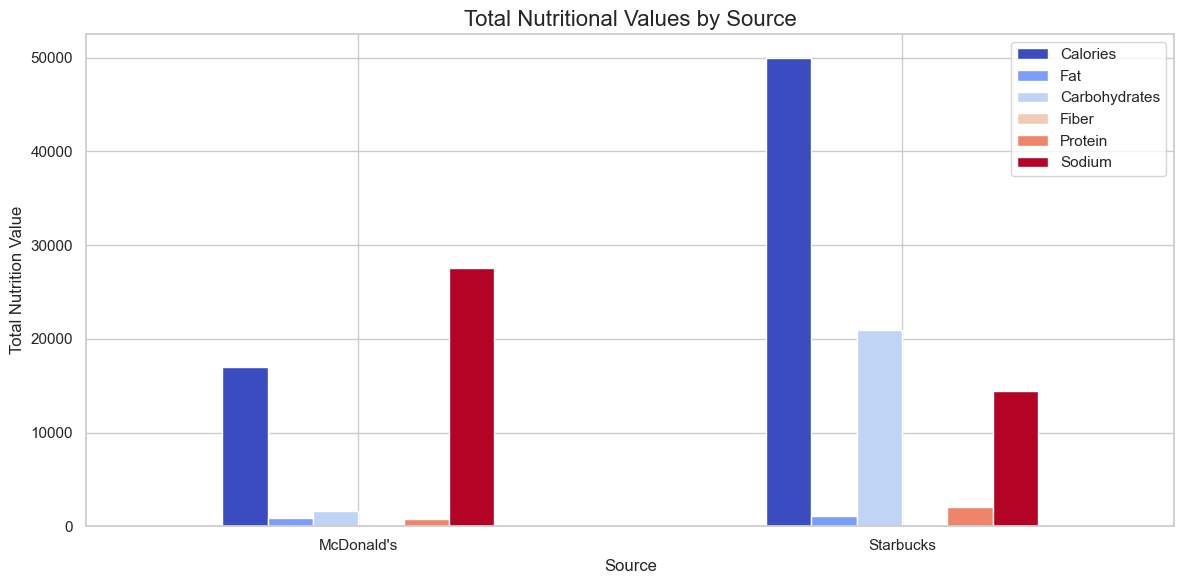

In [53]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is loaded as `df`
# You can use the actual DataFrame you have here

# List of nutritional columns to visualize
nutrition_columns = ['Calories', 'Fat', 'Carbohydrates', 'Fiber', 'Protein', 'Sodium']

# Group by 'Source' and calculate the sum of nutritional columns
nutrition_totals = combined_nutrition_pdf.groupby('Source')[nutrition_columns].sum().reset_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot for each nutrient, comparing McDonald's and Starbucks
nutrition_totals.set_index('Source').plot(kind='bar', figsize=(12, 6), stacked=False, cmap='coolwarm')

# Add labels and title
plt.title('Total Nutritional Values by Source', fontsize=16)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Total Nutrition Value', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


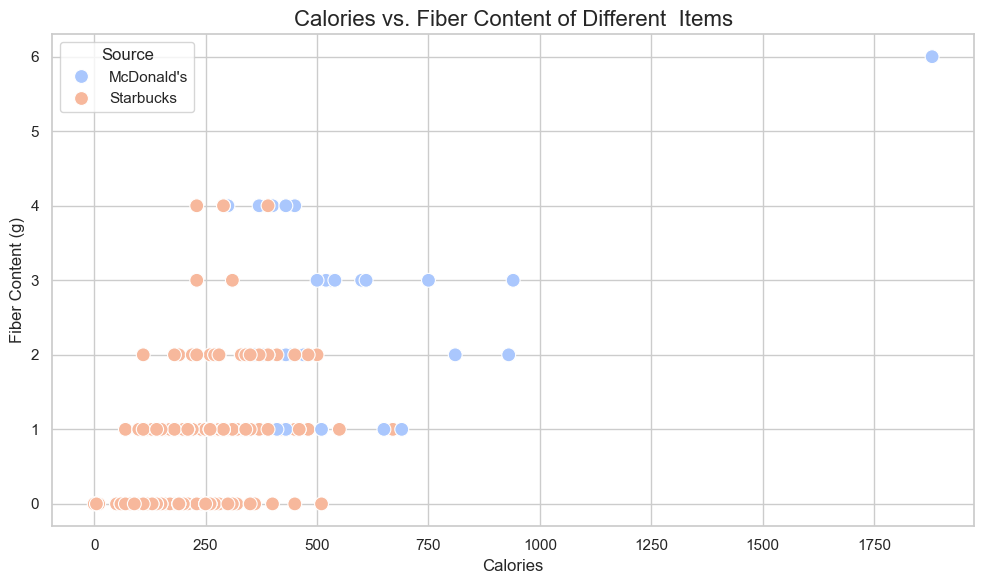

In [55]:
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Calories', y='Fiber', data=combined_nutrition_pdf, hue='Source', palette='coolwarm', s=100)

# Add labels and title
plt.title('Calories vs. Fiber Content of Different  Items', fontsize=16)
plt.xlabel('Calories', fontsize=12)
plt.ylabel('Fiber Content (g)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

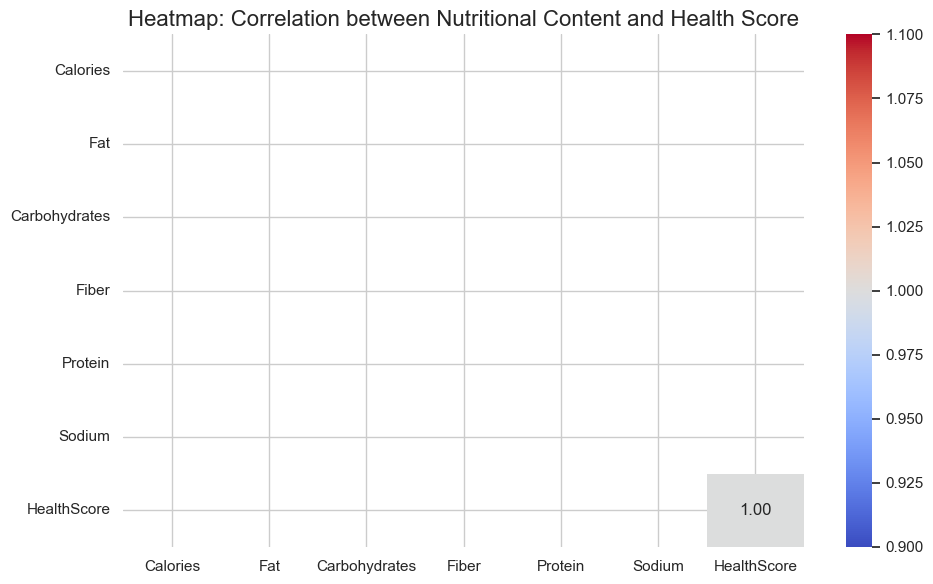

In [57]:
df = pd.DataFrame(columns=['Item', 'Calories', 'Fat', 'Carbohydrates', 'Fiber', 'Protein', 'Sodium', 'Source'])

# Calculate the Health Score dynamically
# Health Score is based on: 
# - Low-calorie (Calories < 200),
# - Low-fiber (Fiber < 2),
# - High-protein (Protein > 15)

combined_nutrition_pdf['HealthScore'] = (combined_nutrition_pdf['Calories'] < 200) & (combined_nutrition_pdf['Fiber'] < 2) & (combined_nutrition_pdf['Protein'] > 15)

# Create a DataFrame of only the nutritional columns
nutrition_columns = ['Calories', 'Fat', 'Carbohydrates', 'Fiber', 'Protein', 'Sodium']
df_nutrition = df[nutrition_columns]

# Normalize the nutritional data for better visualization
df_normalized = (df_nutrition - df_nutrition.min()) / (df_nutrition.max() - df_nutrition.min())

# Add Health Score to the normalized DataFrame
df_normalized['HealthScore'] = combined_nutrition_pdf['HealthScore']

# Set the style for the plot
sns.set(style="whitegrid")

# Create the heatmap based on correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df_normalized.corr(), annot=True, cmap="coolwarm", cbar=True, fmt='.2f')

# Add title to the plot
plt.title('Heatmap: Correlation between Nutritional Content and Health Score', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

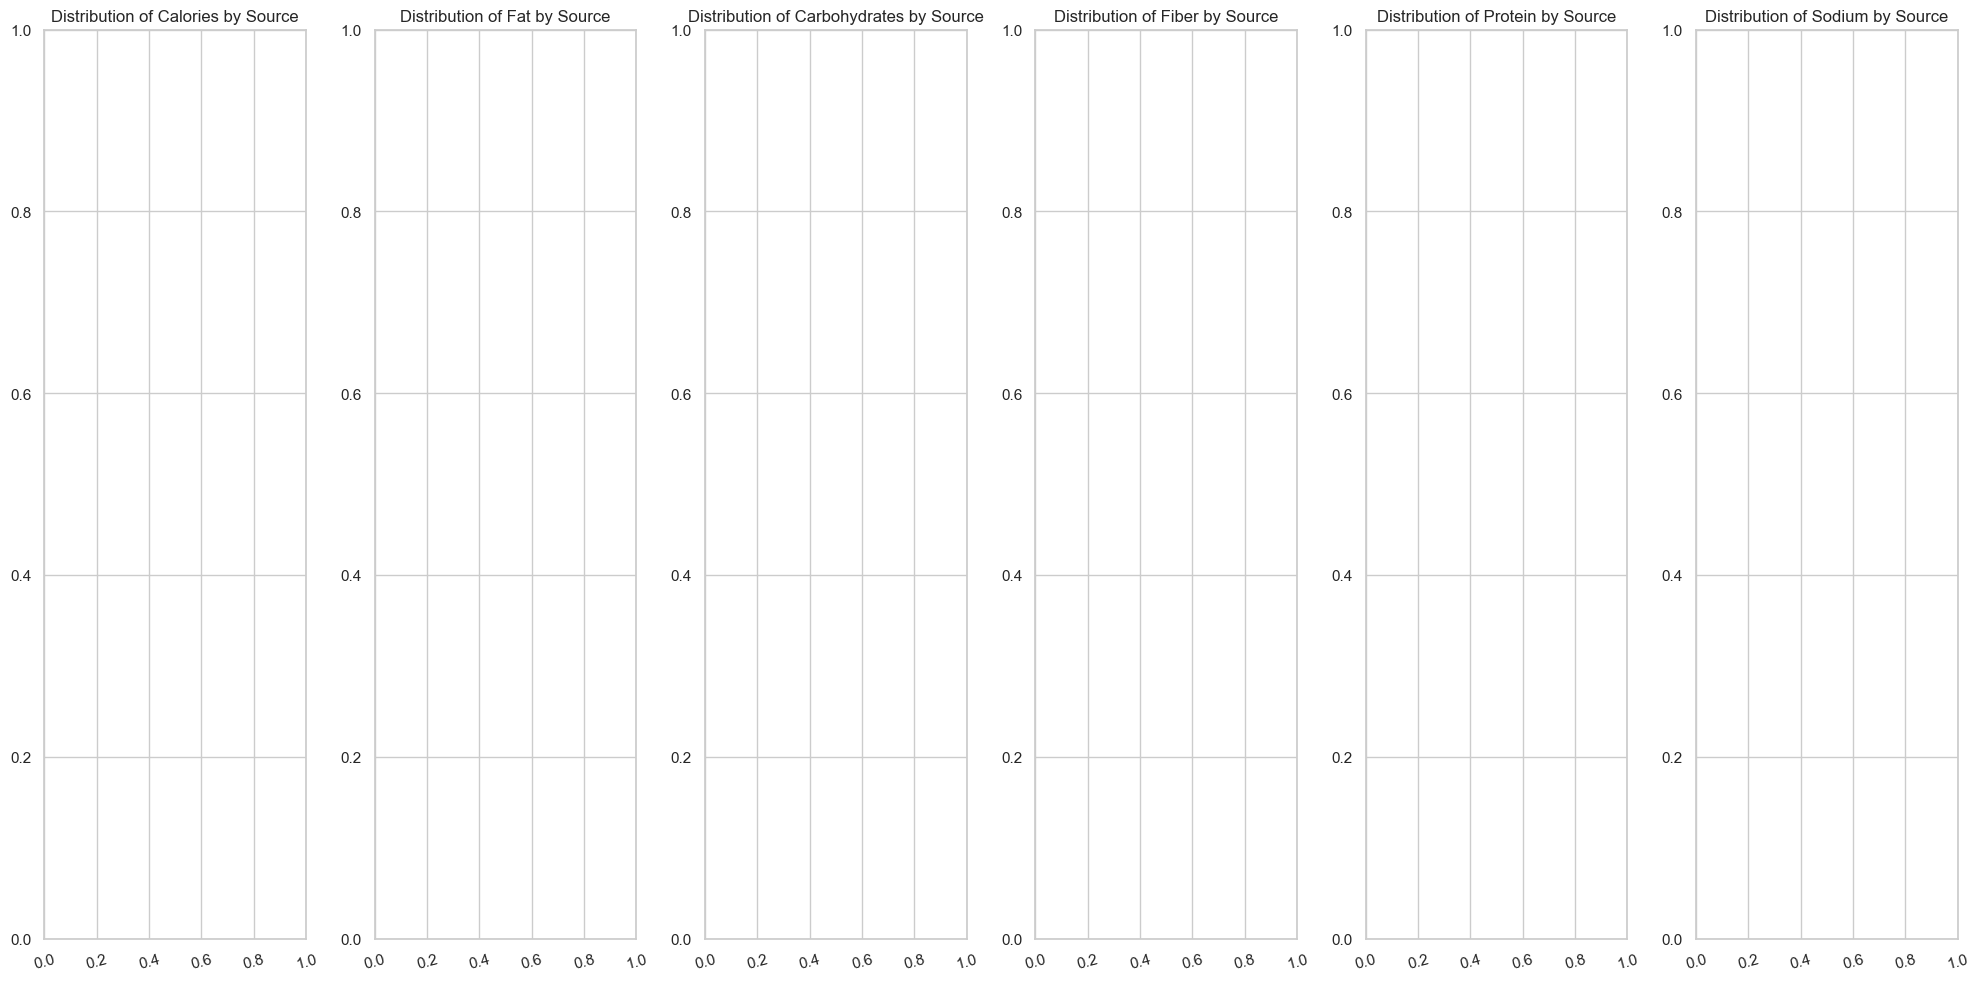

In [59]:
nutrients = ['Calories', 'Fat', 'Carbohydrates', 'Fiber', 'Protein', 'Sodium']
plt.figure(figsize=(20, 10))

# Create a box plot for each nutrient
for i, nutrient in enumerate(nutrients, 1):
    plt.subplot(1, len(nutrients), i)  # Multiple plots in one row
    sns.boxplot(x="Source", y=nutrient, data=df, palette="coolwarm")
    plt.title(f"Distribution of {nutrient} by Source")
    plt.xticks(rotation=15)

# Adjust layout
plt.tight_layout()
plt.show()

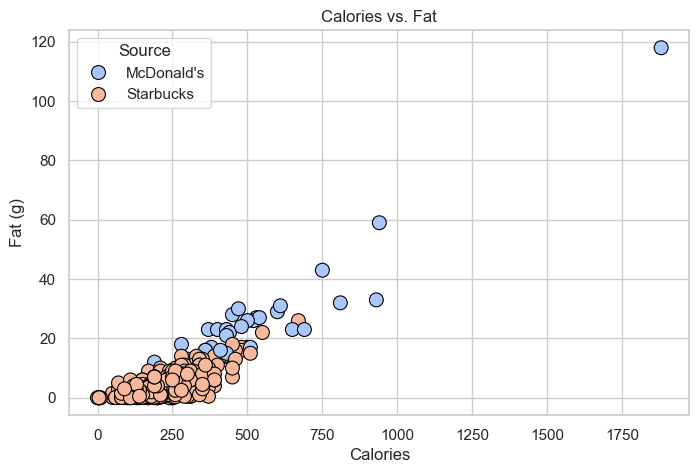

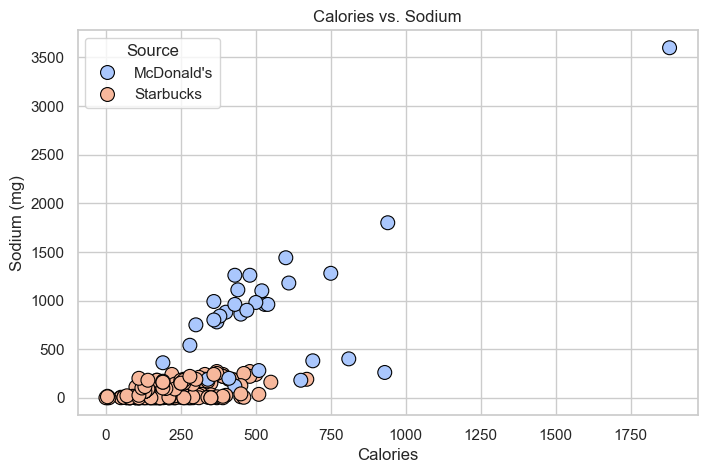

In [61]:

# ✅ Ensure you're using the correct DataFrame (Replace df with your actual DataFrame)
df = combined_nutrition_pdf  # Ensure this is a valid DataFrame

# ✅ Scatter Plot: Calories vs. Fat
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Calories', y='Fat', hue='Source', data=df, palette='coolwarm', s=100, edgecolor='black')
plt.title('Calories vs. Fat')
plt.xlabel('Calories')
plt.ylabel('Fat (g)')
plt.show()

# ✅ Scatter Plot: Calories vs. Sodium
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Calories', y='Sodium', hue='Source', data=df, palette='coolwarm', s=100, edgecolor='black')
plt.title('Calories vs. Sodium')
plt.xlabel('Calories')
plt.ylabel('Sodium (mg)')
plt.show()


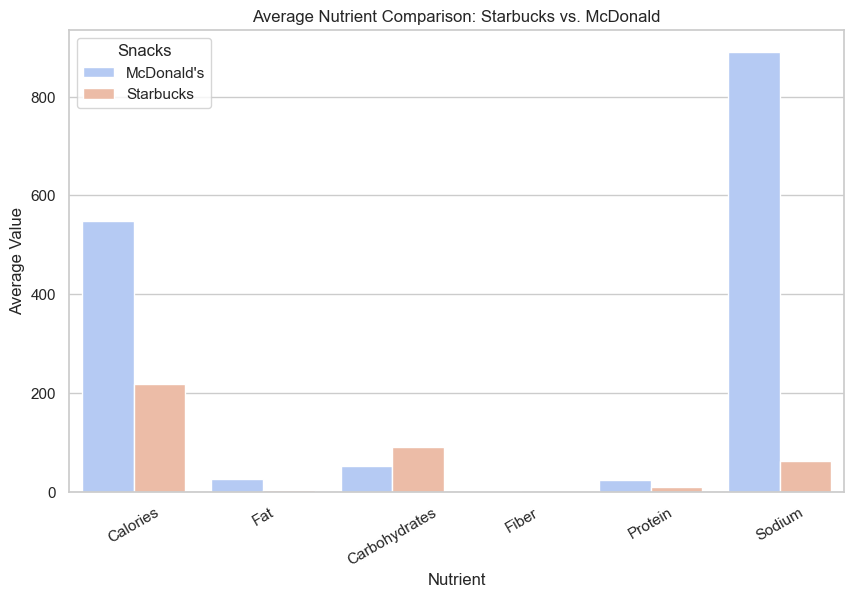

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Ensure df is your DataFrame (Replace with actual DataFrame)
df = combined_nutrition_pdf  # Make sure this DataFrame contains 'Source' and nutrient columns

# ✅ Compute Averages for Each Restaurant
avg_nutrients = df.groupby('Source')[['Calories', 'Fat', 'Carbohydrates', 'Fiber', 'Protein', 'Sodium']].mean()

# ✅ Reset index for easier plotting
avg_nutrients = avg_nutrients.reset_index()

# ✅ Melt DataFrame for Seaborn (long format for grouped bars)
melted_df = avg_nutrients.melt(id_vars=['Source'], var_name='Nutrient', value_name='Average Value')

# ✅ Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Nutrient', y='Average Value', hue='Source', data=melted_df, palette='coolwarm')

# ✅ Improve readability
plt.title('Average Nutrient Comparison: Starbucks vs. McDonald')
plt.ylabel('Average Value')
plt.xlabel('Nutrient')
plt.xticks(rotation=30)  # Rotate x-axis labels for clarity
plt.legend(title='Snacks')

# ✅ Show plot
plt.show()


In [44]:
# Group by restaurant and compute mean for each nutrient
avg_nutrition = df.groupby("Source")[["Calories", "Fat", "Carbohydrates", "Fiber", "Protein", "Sodium"]].mean()

print(avg_nutrition)


              Calories        Fat  Carbohydrates     Fiber    Protein  \
Source                                                                  
McDonald's  547.741935  27.161290      53.000000  2.451613  23.483871   
Starbucks   219.276316   4.763158      91.868421  0.701754   9.107018   

                Sodium  
Source                  
McDonald's  890.322581  
Starbucks    63.656388  


In [ ]:
# Formula
# HealthScore= (Protein×4)+(Fiber×3)/(Calories+(Fat×9)+(Carbohydrates×4)+(Sodium×0.002))
# 9 calories per gram
# 4 calories per gram in protein
 
# Fat × 9: Reflects the higher calorie density of fat.

# Protein × 4 and Carbohydrates × 4: Reflects their energy contribution.

# Fiber × 3: Gives weight to fiber's health benefits, despite it not contributing directly to calories.



In [83]:
import pandas as pd

# Average nutritional values for McDonald's and Starbucks
data = {
    "Calories": [547.74, 219.28],
    "Fat": [27.16, 4.76],
    "Carbohydrates": [53.00, 91.87],
    "Fiber": [2.45, 0.70],
    "Protein": [23.48, 9.11],
    "Sodium": [890.32, 63.66]
}

# Create DataFrame with these values
avg_nutrition = pd.DataFrame(data, index=["McDonald's", "Starbucks"])

avg_nutrition["HealthScore"] = (
    (avg_nutrition["Protein"] * 4 + avg_nutrition["Fiber"] * 3) /
    (avg_nutrition["Calories"] + (avg_nutrition["Fat"] * 9) + (avg_nutrition["Carbohydrates"] * 4) + (avg_nutrition["Sodium"] * 0.002))
)

print(avg_nutrition[["HealthScore"]])


            HealthScore
McDonald's     0.100670
Starbucks      0.061201


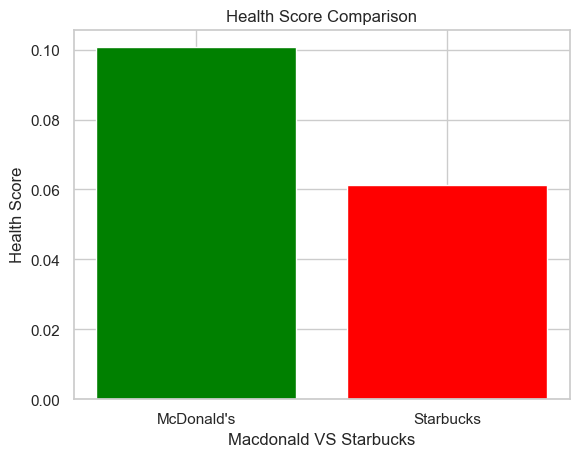

In [89]:
import matplotlib.pyplot as plt

# Health Scores
restaurants = ["McDonald's", "Starbucks"]
scores = [0.100670, 0.061201]

# Plot
plt.bar(restaurants, scores, color=['green', 'red'])

# Labels and title
plt.xlabel("Macdonald VS Starbucks")
plt.ylabel("Health Score")
plt.title("Health Score Comparison")

# Show the chart
plt.show()


In [47]:
# combined_nutrition_df = combined_nutrition_df.withColumn(
#     "HealthScore",
#     when(col("Calories") != 0, (col("Protein") * 4 + col("Fiber") * 3) / col("Calories"))
#     .otherwise(0)
# )

In [82]:
# combined_nutrition_df=combined_nutrition_df.orderBy(col("HealthScore").desc()).select("Item","Calories","Protein","Fiber","HealthScore").show(truncate=False,n=combined_nutrition_df.count())
# combined_nutrition_df

In [84]:
# combined_nutrition_df=combined_nutrition_df.orderBy(col("HealthScore").desc()).select("Item","Calories","Protein","Fiber","HealthScore")
# combined_nutrition_df

DataFrame[Item: string, Calories: double, Protein: double, Fiber: double, HealthScore: double]

In [117]:
# combined_nutrition_df.groupBy("Item").count().show()

In [90]:
nutritionfood_spark.printSchema()

root
 |-- Unnamed: 0: string (nullable = true)
 |-- Calories: integer (nullable = true)
 |-- Fat (g): float (nullable = true)
 |-- Carb. (g): integer (nullable = true)
 |-- Fiber (g): integer (nullable = true)
 |-- Protein (g): integer (nullable = true)



In [92]:
from pyspark.sql.functions import col, lit, when

# Define McDonald's and Starbucks item keywords with regex for flexible matches
mcdonalds_items = [
    "Big Mac", "McRib", "McNuggets", "McFlurry", "McChicken", "McDouble", "Quarter Pounder", 
    r"(\w*\s*)?McMuffin"  # This will match variations like "Sausage McMuffin", "Egg McMuffin"
]
mcdonalds_pattern = "|".join(mcdonalds_items)
df1_spark_a = menu_spark.withColumn(
    "Source",
    when(col("Item").rlike(mcdonalds_pattern), lit("McDonald's")).otherwise(lit("unknown"))
)

In [95]:
#for mc donalds
mcdonalds_df = df1_spark_a.filter(df1_spark_a["Source"] == "McDonald's")
mcdonalds_df

DataFrame[Category: string, Item: string, Serving Size: string, Calories: int, Calories from Fat: int, Total Fat: float, Total Fat (% Daily Value): int, Saturated Fat: float, Saturated Fat (% Daily Value): int, Trans Fat: float, Cholesterol: int, Cholesterol (% Daily Value): int, Sodium: int, Sodium (% Daily Value): int, Carbohydrates: int, Carbohydrates (% Daily Value): int, Dietary Fiber: int, Dietary Fiber (% Daily Value): int, Sugars: int, Protein: int, Vitamin A (% Daily Value): int, Vitamin C (% Daily Value): int, Calcium (% Daily Value): int, Iron (% Daily Value): int, Source: string]

In [97]:
mcdonalds_df = mcdonalds_df.withColumn(
    "HealthScore",
    when(col("Calories") != 0, (col("Protein") * 4 + col("Dietary Fiber") * 3) / col("Calories"))
    .otherwise(0)
)

In [99]:
mcdonalds_df=mcdonalds_df.withColumn("HealthScore",when(col("Calories") !=0,((col("Protein").cast("double")*4)+(col("Dietary Fiber").cast("double")*3))/col("Calories").cast("double")).otherwise(0))

In [101]:
# mcdonalds_df=mcdonalds_df.orderBy(col("HealthScore").desc()).select("Item", "Calories", "protein", "Dietary Fiber", "HealthScore").show(n=mcdonalds_df.count(), truncate=False)
# mcdonalds_df

In [103]:
mcdonalds_df=mcdonalds_df.orderBy(col("HealthScore").desc()).select("Item","Calories","Protein","Dietary Fiber","HealthScore")
mcdonalds_df

DataFrame[Item: string, Calories: int, Protein: int, Dietary Fiber: int, HealthScore: double]

In [105]:
type(mcdonalds_df)

pyspark.sql.dataframe.DataFrame

In [229]:
combined_nutrition_df.count()

792